In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [13]:
# 데이터 불러오기
mackerel_output=pd.read_csv('../data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
temperature_jung=pd.read_csv('../data/temperature/207정선_월별_2.csv')
temperature_jung_output=pd.merge(temperature_jung,mackerel_output,on=['년도','월'])
temperature_jung_output.iloc[:,2:].corr()

,수온(50m),염분(50m),용존산소(50m),기압,생산량
수온(50m),1.000000,-0.408384,-0.589058,0.024855,0.372951
염분(50m),-0.408384,1.000000,0.611199,-0.013198,-0.264948
용존산소(50m),-0.589058,0.611199,1.000000,0.056922,-0.377875
기압,0.024855,-0.013198,0.056922,1.000000,0.239760
생산량,0.372951,-0.264948,-0.377875,0.239760,1.000000


In [25]:
month_temperature_jung=temperature_jung_output[temperature_jung_output['월']==12]
month_temperature_jung=month_temperature_jung.reset_index().drop(columns='index')
month_temperature_jung.iloc[:,2:].corr()

,수온(50m),염분(50m),용존산소(50m),기압,생산량
수온(50m),1.000000,0.194078,0.320199,-0.081357,-0.134251
염분(50m),0.194078,1.000000,0.012715,-0.211939,0.250160
용존산소(50m),0.320199,0.012715,1.000000,-0.269808,0.356025
기압,-0.081357,-0.211939,-0.269808,1.000000,0.070259
생산량,-0.134251,0.250160,0.356025,0.070259,1.000000


In [6]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(month_temperature_jung.iloc[:,2:])
test=scaler_x.transform(month_temperature_jung.iloc[:,2:])
standard_data_jung=pd.DataFrame(test)

In [7]:
standard_data_jung.rename(columns={0:'수온',1:'염분',2:'용존산소',3:'기압',4:'생산량'}, inplace=True)
standard_data_jung

,수온,염분,용존산소,기압,생산량
0,-1.276895,1.613065,-0.887839,0.369991,-0.167927
1,-1.644221,-2.031985,1.575063,-0.118397,-0.213356
2,-0.122442,1.389442,-0.919185,0.547587,-0.969080
3,-1.591746,0.159518,2.691845,-0.207195,-1.049784
4,0.507260,-0.041743,-0.862730,-1.183971,1.691989
5,-0.542243,-0.556075,-1.091268,-2.915529,-0.084551
6,0.559735,-0.734973,0.508019,-1.095173,-0.056225
7,-0.279867,-1.786000,-0.184153,0.458789,0.698965
8,-0.437293,0.494952,-0.771411,0.547587,0.074717
9,0.244884,-0.354815,-0.040217,0.991576,0.919696


In [8]:
standard_data_jung['년도']=month_temperature_jung['년도']
standard_data_jung['월']=month_temperature_jung['월']
standard_data_jung

,수온,염분,용존산소,기압,생산량,년도,월
0,-1.276895,1.613065,-0.887839,0.369991,-0.167927,2008,7
1,-1.644221,-2.031985,1.575063,-0.118397,-0.213356,2009,7
2,-0.122442,1.389442,-0.919185,0.547587,-0.969080,2010,7
3,-1.591746,0.159518,2.691845,-0.207195,-1.049784,2011,7
4,0.507260,-0.041743,-0.862730,-1.183971,1.691989,2012,7
5,-0.542243,-0.556075,-1.091268,-2.915529,-0.084551,2013,7
6,0.559735,-0.734973,0.508019,-1.095173,-0.056225,2014,7
7,-0.279867,-1.786000,-0.184153,0.458789,0.698965,2015,7
8,-0.437293,0.494952,-0.771411,0.547587,0.074717,2016,7
9,0.244884,-0.354815,-0.040217,0.991576,0.919696,2017,7


C:\Users\it\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\it\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\it\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\it\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\it\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from 

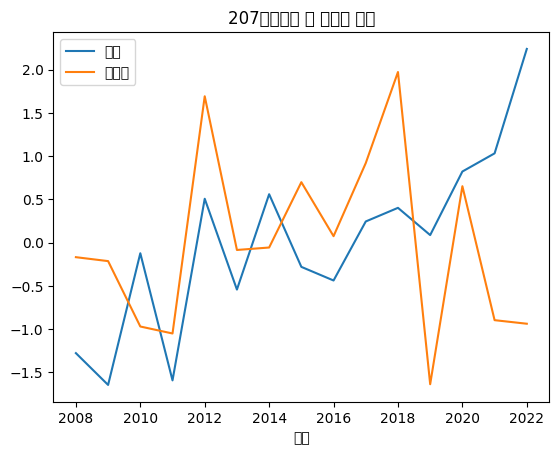

In [9]:
# 207정선수온 및 생산량 평균
plt.figure()


plt.title('207정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['년도'],standard_data_jung['수온'],label='수온')
plt.plot(standard_data_jung['년도'],standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()

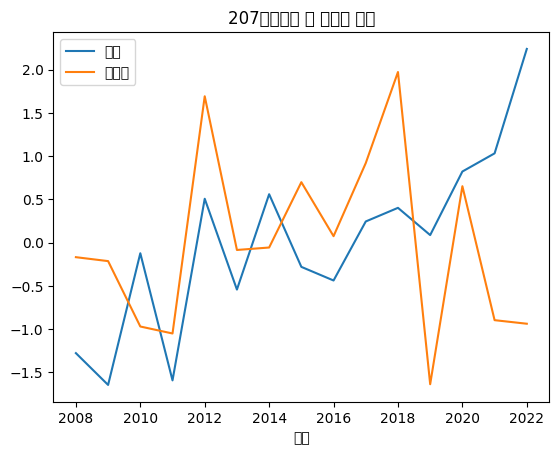

In [10]:
# 수온 - 0 / 생산량 - 1
plt.figure()


plt.title('207정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['년도'],standard_data_jung['수온'],label='수온')
plt.plot(standard_data_jung['년도'],standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()